In [2]:
#Importujemy niezbędne pakiety narzędzi
"""numpy dostarcza licznych rozwiązań do wykonywania operacji numerycznych jak potęgowanie,
logarytmowanie etc. https://numpy.org/"""
import numpy as np 

"""pandas dostarcza szerego gotowych rozwiązań do analizy danych m.in. gotowe struktury do
przechowywanie danych, szybkie podsumowanie statystyk, usuwanie rekordów, https://pandas.pydata.org/"""

import pandas as pd 

"""Scikit-learn dostarcza szeregu narzędzi umożliwiających manipulacje danymi, wstępną obróbkę danych
budowę modeli precykcyjnych oraz ich ocenę https://scikit-learn.org/stable/"""
from sklearn import * 

"""Matplotlib pozwala na przygotowanie wykresów - będziemy używali tego narzędzia do wizualizacji. 
https://matplotlib.org/"""
import matplotlib.pyplot as plt

In [3]:
"""W pierwszym etapie wczytujemy dane - jeżeli otworzyliśmy program jupyter-notebook katalogu, 
gdzie znajdują się dane, to wystarczy podać nazwę pliku, jeżeli nie to musimy podać pełną ścieżkę dostępu.
W celu zdobycia dodatkowej praktyki polecam przeprowadzić cały proces analizy z bazą danych poszerzoną o
dodatkowe zmienne niezależne: full_solubility_database"""
raw_df = pd.read_csv("raw_simple_solubility_database.csv", sep=",")

In [4]:
"""Po załadowaniu danych wyświetlmy je np. przez wpisanie nazwy wcześniej utworzonego obiektu."""
raw_df

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,95.000000
1,Benzo[cd]indol-2(1H)-one,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,94.100000
2,4-chlorobenzaldehyde,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,935.000000
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,90.000000
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,9.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,compound95,82.146,2.1166,27.6080,6.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,NaN,1.0,0.00,38.868527,2.255145e+00,160.000000
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287e+00,8000.000000
10079,compound97,147.004,2.9934,36.4620,8.0,0.0,0.0,2.0,0.0,42.0,1.0,0.0,0.0,1.0,0.00,NaN,3.032456e+00,65.664275
10080,compound98,267.737,3.1408,68.7025,17.0,2.0,NaN,5.0,3.0,88.0,2.0,0.0,0.0,2.0,46.17,105.102402,2.269002e+00,24.986671


In [6]:
"""Zobaczmy jakie metody możemy wywołać na tym obiekcie, wpisując nazwę obiektu oraz "kropkę" np "raw_df."" i wciskając
"Tab" wyświetlą się metody jakie możemy zastosować dla naszego obiektu. Ponadto po wpisaniu nazwy metody, mamy 
możliwość podglądu dokumentacji ("Shift+Tab"), gdzie znajdują się informacje o jej działaniu oraz parametrach"""

"""W ramach ćwiczenia, proszę zmodyfikować liczbę wyświetlanych rekordów do 3"""

raw_df.head() 

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
0,"N,N,N-trimethyloctadecan-1-aminium bromide",392.510,3.9581,102.4454,23.0,0.0,0.0,2.0,17.0,142.0,0.0,0.0,0.0,0.0,0.00,158.520601,0.000000e+00,95.0
1,Benzo[cd]indol-2(1H)-one,169.183,2.4055,51.9012,13.0,1.0,1.0,2.0,0.0,62.0,2.0,0.0,1.0,3.0,29.10,75.183563,2.582996e+00,94.1
2,4-chlorobenzaldehyde,140.569,2.1525,36.8395,9.0,1.0,0.0,2.0,1.0,46.0,1.0,0.0,0.0,1.0,17.07,58.261134,3.009782e+00,935.0
3,"zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...",756.226,8.1161,200.7106,53.0,6.0,2.0,7.0,10.0,264.0,6.0,0.0,0.0,6.0,120.72,323.755434,2.322963e-07,90.0
4,4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...,422.525,2.4854,119.0760,31.0,6.0,0.0,6.0,12.0,164.0,2.0,4.0,4.0,6.0,56.60,183.183268,1.084427e+00,9.2


In [ ]:
"""Metoda *.tail pozwala wyświetlić n ostatnich rekordów z obiektu DataFrame

Proszę zmodyfikować liczbę wyświetlanych rekodwów do 7"""

raw_df.tail()


In [ ]:
"""Metoda describe() pozwala na wyświetlenie podstawowych statystyk dla naszego obiektu jak ilość rekordów, średnią, std
wartość minimalną i maksymalną dla każdej kolumny"""

raw_df.describe()

In [7]:
"""Warto zorientować się jakie mamy nazwy kolumn, można to zastosować do selekcji nowych podzwiorów określając 
numery indeksów np. raw_df[raw_df.columns[1]]"""
raw_df.columns
raw_df.columns[1:2]

"""W celu wyświetlenia rekordów, które spełniają określony warunek np. wartość liczbową w określonej kolumnie możemy 
wywołać poniższy kod"""
raw_df[raw_df.solubility_mg_L>1000]

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
12,"2,3-dimethylphenol; 2,4-dimethylphenol; 2,5-di...",733.002,12.05424,225.4848,54.0,6.0,6.0,6.0,0.0,288.0,6.0,0.0,0.0,6.0,121.38,322.890738,3.240000e-07,7669.999999
30,hydroxylamine,33.030,-0.66570,5.9739,2.0,2.0,2.0,2.0,0.0,14.0,0.0,0.0,0.0,0.0,46.25,12.462472,1.000000e+00,5700.000000
32,benzyl-tributylazanium; 4-hydroxynaphthalene-1...,499.717,6.85320,143.3074,35.0,4.0,1.0,6.0,12.0,192.0,3.0,0.0,0.0,3.0,77.43,211.312915,2.560000e-07,1140.000000
41,cyclohexanecarboxylic acid,128.171,1.65130,34.2108,9.0,1.0,1.0,2.0,1.0,52.0,0.0,1.0,1.0,1.0,37.30,54.878828,2.312192e+00,4600.000000
42,pentasodium 5-{[4-chloro-6-({3-[2-(sulfonatoox...,1136.328,-14.30130,212.8884,69.0,26.0,3.0,38.0,15.0,340.0,5.0,0.0,1.0,6.0,433.56,507.575472,4.760995e-06,441170.000048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10074,compound92,60.100,-0.65980,NaN,4.0,2.0,2.0,2.0,1.0,26.0,0.0,0.0,0.0,0.0,24.06,26.174054,1.974745e+00,999941.221342
10075,compound93,100.117,0.55450,25.9790,7.0,NaN,0.0,2.0,2.0,40.0,0.0,0.0,0.0,0.0,34.14,42.522064,3.577920e+00,66697.234592
10076,compound94,258.343,0.46640,67.1612,17.0,4.0,3.0,6.0,6.0,NaN,0.0,1.0,1.0,1.0,78.43,105.958624,2.832505e+00,1076.952871
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287e+00,8000.000000


In [8]:
"""Wyniki możemy również wyświetlać teracyjnie przechodząc przez każdy rekord. Poniższy przykład wypisuje wartość columny
MolWt przedstawiającej masę molową związku. Proszę wyświetlić dodatkowo nazwę związku chemicznego."""

for i, s in raw_df.iterrows():
    print(s["MolWt"])

392.51000000000016
169.18299999999996
140.569
756.2260000000003
422.52500000000015
118.179
170.25199999999995
376.4490000000001
218.202
342.39099999999996
149.19299999999996
192.25800000000004
733.0020000000003
206.285
260.255
154.253
214.648
660.2820000000003
180.556
228.332
218.362
136.238
202.138
150.47199999999995
181.235
604.1740000000002
195.476
136.238
386.62100000000015
258.402
33.03
192.21400000000003
499.71700000000016
184.279
570.3679999999998
366.50500000000017
220.356
158.24399999999994
95.94
198.306
148.249
128.17100000000002
1136.3280000000002
344.50199999999984
658.8910000000002
426.3480000000001
252.364
152.237
1026.263
868.35
189.324
256.342
298.427
502.30700000000013
215.168
148.16099999999997
192.258
178.275
196.29
166.264
140.22599999999997
268.312
488.67100000000033
284.399
891.500999999999
186.295
116.161
121.18299999999998
228.332
360.45000000000016
622.5880000000002
389.835
206.24099999999999
338.44400000000013
34.033
214.264
379.37500000000017
591.621000000000

401.33300000000014
428.4780000000003
243.284
26.038
134.17799999999997
162.23199999999997
223.253
264.40899999999993
175.22799999999995
170.296
184.27900000000002
261.346
797.056
217.31199999999995
144.47899999999996
356.44300000000015
447.561
407.91000000000025
151.253
181.147
300.35800000000006
167.25799999999995
162.192
140.613
118.17899999999996
164.204
391.594
116.189
212.138
114.094
172.42
170.252
750.9399999999997
206.32899999999992
316.39700000000005
101.19299999999998
580.5390000000002
206.729
84.31299999999997
278.348
470.56300000000033
212.333
228.28799999999995
198.218
67.51899999999999
354.53700000000015
228.247
129.16199999999998
281.311
192.302
74.07900000000002
217.202
137.18199999999996
540.5990000000002
222.284
168.15200000000004
97.45700000000001
306.27100000000013
148.083
116.15999999999998
360.4470000000002
182.263
197.278
972.86
349.41200000000015
198.269
217.312
142.24200000000005
97.11699999999998
100.03900000000002
295.6
176.21200000000005
226.34799999999998
90

164.13899999999995
129.839
137.09199999999998
395.58100000000013
218.205
72.107
264.318
192.123
84.08200000000002
261.23400000000004
214.105
666.3950000000002
1015.0159999999997
150.13
205.254
150.08599999999996
685.4150000000006
188.176
188.179
296.57599999999996
202.25
177.32600000000005
56.06500000000001
89.09399999999998
226.107
117.19200000000001
278.261
190.109
202.21400000000003
146.18599999999995
113.204
99.089
148.11499999999995
629.3730000000003
492.5860000000003
113.116
650.5770000000002
236.08700000000002
108.14399999999999
132.203
86.04599999999998
173.25799999999995
248.26
108.1
238.43599999999998
144.196
217.18400000000003
239.38299999999992
118.176
157.21299999999997
194.04999999999995
182.156
129.115
72.107
88.175
136.14999999999998
64.515
148.98000000000005
926.8110000000003
121.18299999999999
127.574
172.12400000000005
542.5890000000003
116.208
155.15699999999995
168.236
125.90200000000002
222.24
126.119
157.60000000000005
154.08499999999995
242.271
123.1109999999999

502.7370000000003
76.051
165.628
134.142
391.63700000000017
102.133
172.18
310.38000000000005
271.44499999999994
161.158
323.0200000000001
626.5540000000002
146.142
136.19799999999998
174.196
477.38300000000015
318.351
1168.9109999999996
681.6630000000002
299.547
1167.2440000000004
500.6740000000004
234.735
342.8060000000001
356.81800000000015
120.057
292.632
118.132
292.47600000000006
378.61400000000015
102.181
191.706
146.18599999999995
200.322
128.175
142.202
114.19200000000001
148.202
113.16
130.14299999999997
82.10600000000002
245.41099999999997
104.15299999999999
222.28099999999995
178.22799999999995
115.176
153.203
146.142
132.071
166.173
263.16799999999995
388.29700000000014
91.11
82.10599999999998
101.105
118.088
129.159
224.253
109.6
129.159
130.191
59.06800000000001
109.15000000000002
528.6840000000007
145.25
168.358
149.912
481.9780000000002
184.192
361.87300000000016
185.24
673.6840000000002
482.40700000000015
234.248
171.19599999999997
88.17399999999998
221.177
663.430000

157.25699999999995
162.283
311.888
104.178
90.12200000000001
160.16899999999995
134.22199999999998
171.63099999999997
322.225
107.15599999999998
299.34899999999993
195.218
170.083
204.269
122.16699999999996
240.31
138.122
130.18699999999998
130.18699999999998
72.10700000000001
185.846
124.965
60.096
60.10000000000001
114.232
116.16
444.9300000000002
370.77500000000015
207.319
127.014
227.362
103.12099999999998
102.08899999999998
135.217
126.111
118.607
161.15699999999995
102.13299999999998
184.02
114.959
66.10300000000001
167.19
119.12
106.596
255.416
131.175
133.14700000000002
205.708
94.117
226.44799999999992
327.38700000000006
104.105
98.10099999999998
408.5790000000002
408.36200000000014
194.23
195.222
252.23
189.17
211.475
153.225
137.142
196.206
118.088
211.217
191.18600000000004
224.176
181.191
181.191
267.64
74.07900000000002
96.089
74.12299999999998
162.18499999999997
183.478
98.145
155.42399999999995
331.6269999999999
98.098
108.568
229.93
369.41700000000014
100.2049999999999

188.267
202.29399999999995
146.18599999999995
174.23999999999995
202.29399999999995
360.40600000000006
286.33099999999996
375.13300000000015
174.2
220.272
332.1160000000002
214.648
233.094
186.21400000000003
191.19000000000003
177.20299999999997
156.18499999999997
130.23099999999997
184.27900000000002
250.275
218.256
216.322
250.081
267.237
278.045
292.072
306.09899999999993
320.126
235.066
241.678
271.36
323.1330000000001
197.146
328.202
120.177
113.116
300.046
162.14799999999997
142.286
246.356
161.201
280.365
152.53300000000004
236.271
222.265
212.25199999999995
234.03599999999997
206.197
200.621
260.29
130.14700000000002
214.648
105.524
84.11800000000002
225.292
302.3230000000001
143.17100000000005
162.214
241.50099999999998
158.584
256.312
186.207
222.24
282.126
178.22
249.06400000000002
236.274
240.303
146.14899999999997
160.17600000000004
146.14899999999997
146.14899999999994
232.196
131.17499999999998
152.149
175.14399999999995
116.204
271.185
236.231
240.167
162.188
365.842000

103.12100000000001
174.19599999999997
178.231
150.17700000000005
130.143
88.10600000000002
250.294
167.002
86.134
114.188
86.13399999999999
156.269
177.458
149.404
103.12399999999997
55.07999999999999
53.06399999999999
69.107
172.01399999999995
112.21600000000001
126.243
92.14099999999998
56.108
68.119
84.16199999999998
82.14599999999999
98.189
80.12999999999998
131.17799999999997
119.12699999999998
134.20299999999997
67.09100000000001
118.13899999999997
119.12299999999996
118.17899999999996
82.10199999999998
157.12499999999997
132.16599999999997
181.28500000000003
98.17
112.19699999999996
102.162
64.03399999999999
272.77299999999997
260.762
120.977
135.004
142.201
162.61899999999997
142.201
162.61899999999997
143.189
144.17299999999997
185.25099999999998
156.22799999999995
156.22799999999995
156.22799999999995
170.255
156.22799999999995
156.22799999999995
158.2
184.194
218.639
218.639
137.138
153.13699999999997
213.105
168.10799999999998
153.13699999999997
168.10799999999998
227.132
1

164.15699999999995
204.31400000000002
151.253
279.846
102.093
117.14799999999998
164.986
194.072
116.12
132.11499999999998
211.986
242.403
132.11899999999997
160.16899999999995
198.30999999999992
174.15199999999996
196.202
270.45699999999994
142.11
193.41299999999998
284.48399999999987
99.089
196.29
102.093
186.27599999999995
170.16400000000004
244.331
122.167
109.13199999999998
109.13200000000002
310.522
125.131
228.248
180.156
127.103
128.13399999999996
237.35
134.134
146.52899999999997
134.13399999999996
274.361
164.204
210.233
153.18099999999995
149.19299999999996
214.29
272.4319999999999
224.26
150.17699999999996
150.17699999999996
150.17700000000005
150.181
151.19
228.317
151.19
274.40399999999994
142.11399999999998
142.158
302.45799999999997
150.13299999999995
306.446
147.13299999999995
268.313
242.344
167.233
280.36800000000005
152.149
152.149
287.343
190.98
171.63099999999997
256.37100000000004
252.31400000000002
316.4410000000001
154.12099999999995
170.21200000000005
148.143


464.8580000000002
365.5020000000002
360.45000000000016
316.48500000000007
478.88500000000033
413.42600000000033
444.44000000000017
350.45800000000014
446.01600000000025
465.63100000000037
385.41600000000017
665.7330000000004
106.168
228.294
180.21
153.82299999999995
185.846
250.33900000000003
188.657
257.547
291.992
102.177
148.161
102.133
108.14
118.176
330.46800000000013
380.4560000000001
138.122
156.56799999999996
101.193
129.247
281.35200000000003
167.12
277.238
169.61099999999996
180.163
270.225
113.204
261.91900000000004
132.119
178.22
142.19799999999995
152.237
154.253
210.229
256.32699999999994
218.20800000000003
335.2820000000001
198.22099999999998
266.34
296.4140000000001
312.4530000000001
408.36200000000014
585.6080000000002
165.19199999999995
180.159
252.273
352.4710000000002
296.374
291.3939999999999
351.42600000000016
196.213
263.64
270.26599999999996
188.226
240.111
255.484
187.198
172.23099999999994
180.228
193.246
255.31699999999992
180.22799999999998
207.32
215.249000

397.23199999999997
195.174
257.289
144.25799999999995
232.41
255.484
375.374
114.232
262.43699999999995
122.167
60.10000000000001
100.117
258.343
82.146
135.20999999999998
147.00400000000005
267.737
250.081


In [8]:
"""Kolumny również można wypisać stosując pętlę for. A co jeżeli chcemy wypisać tylko pierwsze 10 kolumn? - proszę 
spróbować zmodyfikować kod"""
for i in raw_df.columns:
    print(i)

Name
MolWt
MolLogP
MolMR
HeavyAtomCount
NumHAcceptors
NumHDonors
NumHeteroatoms
NumRotatableBonds
NumValenceElectrons
NumAromaticRings
NumSaturatedRings
NumAliphaticRings
RingCount
TPSA
LabuteASA
BalabanJ
solubility_mg_L


In [9]:
"""Sprawdźmy czy w naszej bazie danych mamy jakieś puste komórki. Jest to bardzo ważny element poprzedzający budowę 
modeli"""
raw_df.isna().sum()

Name                    0
MolWt                   4
MolLogP                12
MolMR                   7
HeavyAtomCount          4
NumHAcceptors           6
NumHDonors              3
NumHeteroatoms          9
NumRotatableBonds       4
NumValenceElectrons     5
NumAromaticRings       11
NumSaturatedRings      10
NumAliphaticRings       3
RingCount               2
TPSA                   10
LabuteASA               5
BalabanJ                2
solubility_mg_L         4
dtype: int64

In [5]:
"""Spróbujmy wypisać nasze rekordy z pustymi komórkami. Zmodyfikuj kod, tak aby możliwe było wypisanie wszystkich 
rekordów z pustymi komórkami - może iterrows()?"""
raw_df[raw_df.isna().any(axis=1)]

,Name,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
9982,compound0,221.322,1.1866,55.9083,14.0,3.0,2.0,5.0,NaN,84.0,0.0,1.0,1.0,1.0,66.40,85.831455,2.029093,184.000000
9983,compound1,214.294,0.3715,56.9234,14.0,6.0,1.0,6.0,1.0,78.0,1.0,0.0,NaN,1.0,73.80,86.688142,3.397091,1219.017700
9984,compound2,139.110,1.3004,34.7612,10.0,NaN,1.0,4.0,1.0,52.0,1.0,0.0,0.0,1.0,63.37,56.878613,3.003401,15971.965029
9985,compound3,228.288,2.2292,60.8740,16.0,4.0,0.0,NaN,8.0,92.0,0.0,0.0,0.0,0.0,52.60,96.614146,3.628216,11.090000
9986,compound4,110.971,1.9777,25.7130,5.0,0.0,0.0,2.0,1.0,30.0,0.0,NaN,0.0,0.0,0.00,41.386065,2.847379,2149.856635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10077,compound95,82.146,2.1166,27.6080,6.0,0.0,0.0,0.0,0.0,34.0,0.0,0.0,NaN,1.0,0.00,38.868527,2.255145,160.000000
10078,compound96,135.210,NaN,43.8330,10.0,1.0,0.0,1.0,2.0,54.0,1.0,0.0,0.0,1.0,3.24,62.286063,2.587287,8000.000000
10079,compound97,147.004,2.9934,36.4620,8.0,0.0,0.0,2.0,0.0,42.0,1.0,0.0,0.0,1.0,0.00,NaN,3.032456,65.664275
10080,compound98,267.737,3.1408,68.7025,17.0,2.0,NaN,5.0,3.0,88.0,2.0,0.0,0.0,2.0,46.17,105.102402,2.269002,24.986671


In [10]:
"""Metod postępowania z brakami w danych jest kilka. My usuniemy wszystkie rekordy, gdzie o najmniej jedna komórka
jest pusta. W ramach ćwiczenia polecam wypróbować inne metody postępowania. Tworzymy nowy obiekt df zawierający dane 
po procesie usuwania rekordów z pustymi komórkami."""
df=raw_df.dropna(axis=0, how='any', inplace=False)

In [7]:
"""Sprawdźmy jak teraz wyglądają nasze dane"""
df.describe()

,MolWt,MolLogP,MolMR,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumValenceElectrons,NumAromaticRings,NumSaturatedRings,NumAliphaticRings,RingCount,TPSA,LabuteASA,BalabanJ,solubility_mg_L
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9.982000e+03
mean,266.665946,1.979167,66.794594,17.374674,3.486776,1.108595,5.196955,4.073031,94.243438,1.068323,0.292627,0.447606,1.515929,62.458601,108.912586,2.392199,1.003622e+05
std,184.179024,3.517738,46.523021,12.241536,3.498203,1.488973,4.736275,5.646925,64.748563,1.309427,0.879599,1.054667,1.644334,63.348307,76.462726,1.091123,5.837046e+05
min,9.012000,-40.873200,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.504228,-0.000004,4.400463e-08
25%,162.276000,0.619750,40.602475,11.000000,2.000000,0.000000,3.000000,1.000000,58.000000,0.000000,0.000000,0.000000,0.000000,26.300000,66.623721,2.004357,1.259900e+01
50%,228.682000,1.949220,58.633400,15.000000,3.000000,1.000000,4.000000,3.000000,82.000000,1.000000,0.000000,0.000000,1.000000,50.720000,93.299873,2.539539,5.332473e+02
75%,320.436000,3.419030,81.938000,21.000000,4.000000,2.000000,6.000000,5.000000,112.000000,2.000000,0.000000,1.000000,2.000000,80.390000,129.118374,3.032456,1.200120e+04
max,5299.456000,68.541140,1419.351700,388.000000,86.000000,26.000000,89.000000,141.000000,2012.000000,35.000000,30.000000,30.000000,36.000000,1214.340000,2230.685124,7.517310,3.770000e+07


In [8]:
"""Zobaczmy jak prezentuje nasza zmienna zależna/wyjściowa - numerycznie"""
df.solubility_mg_L.describe()

count    9.982000e+03
mean     1.003622e+05
std      5.837046e+05
min      4.400463e-08
25%      1.259900e+01
50%      5.332473e+02
75%      1.200120e+04
max      3.770000e+07
Name: solubility_mg_L, dtype: float64

(array([9.967e+03, 1.000e+01, 2.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([4.40046342e-08, 3.77000000e+06, 7.54000000e+06, 1.13100000e+07,
        1.50800000e+07, 1.88500000e+07, 2.26200000e+07, 2.63900000e+07,
        3.01600000e+07, 3.39300000e+07, 3.77000000e+07]),
 <a list of 10 Patch objects>)

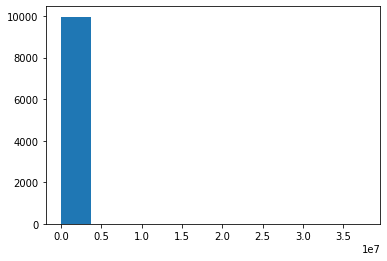

In [11]:
"""Zobaczmy jak prezentuje nasza zmienna zależna/wyjściowa - graficznie"""
plt.hist(df.solubility_mg_L)

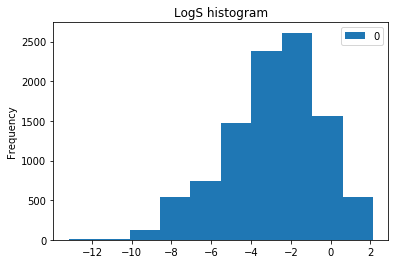

In [12]:
"""Przekształćmy naszą zmienną wyjściową - logarytm powinien zmniejszyć zakres wartości max-min, a dodatkowo,
na podstawie naszej wiedzy o problemie rozpuszczalności przekształćmy rozpuszczalność mg/L na rozpuszczalność molową (S)"""
LogS=np.log10(df.solubility_mg_L/1000/df.MolWt)
"""Zapiszmy nasz LogS w postaci obiektu DataFrame i prawdźmy ponownie jak numerycznie i graficznie prezentuje się rozkład"""
LogS=pd.DataFrame(LogS)
LogS.describe()
LogS.plot(kind="hist", title="LogS histogram")

In [15]:
"""Wstępna przygotowanie danych można uznać za zakończone, pora stworzyć dwa obiekty zawierające zmienen niezależne (X)
oraz zalżne (Y)"""
X=df[df.columns[1:17]]
Y=LogS

# Budowa modelu - regresja liniowa

In [16]:
"""Budowę modelu zaczynamy od zdeiniowania go, a następnie wywołania metody .fit(), która pozwala na jego nauczenie - 
dopasowanie do danych"""
reg = linear_model.LinearRegression(normalize=True)
reg.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [17]:
"""Sprawdźmy jak wyglądaja model: czyli wyraz waolny oraz zestaw wag/współczynników""" 
print(reg.coef_, reg.intercept_)


[[-0.00483823 -0.45543546  0.02279459 -0.03219148  0.14205969  0.12243226
  -0.06330249 -0.02259244  0.02132051 -0.17542452 -0.06181049 -0.1063883
  -0.15500978 -0.00361012 -0.01426212  0.04104454]] [-1.71222639]


In [20]:
"""Ostatnim etapem jest sprawdzenie predykcji/przewidywań na podstawie modelu - zastosujmy nasz obiekt zawierający 
zmienne niezalżne""" 
y_pred = reg.predict(X)

In [21]:
"""Zobaczmy nasze predykcje""" 
y_pred

array([[-3.56314862],
       [-3.39556817],
       [-2.94848479],
       ...,
       [-2.79351987],
       [-3.91675935],
       [-3.80109092]])

In [26]:
"""Porównajmy wartości przewidywane do wartości rzeczywistych (obserwowanych). Proszę spróbować wypisać wszystkie 
rekordy""" 
results=pd.DataFrame(y_pred, columns=["Predicted"])
results["Observed"]=Y
results

,Predicted,Observed
0,-3.563149,-3.616127
1,-3.395568,-3.254767
2,-2.948485,-2.177078
3,-7.177482,-3.924409
4,-4.200199,-4.662065
...,...,...
9977,-2.511387,-3.010000
9978,-1.626737,-2.930000
9979,-2.793520,-2.190000
9980,-3.916759,-3.980000


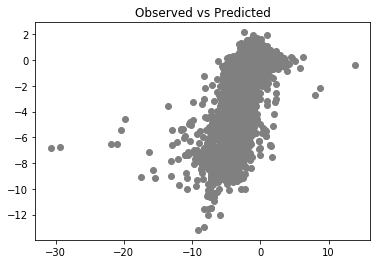

In [24]:
"""Pozostaje nam odpowiedzieć na pytanie jak dobry jest model :). Scikit-learn dostarcza ogromego zbioru metryk
do oceny modeli: .metrics.*"""


"""Jak stwierdzić czy model jest "dobry"? Może graficznie?""" 
plt.scatter(x=y_pred, y=Y,  color='gray')
plt.title("Observed vs Predicted")
plt.show()

In [29]:
"""A może numerycznie?""" 

def RMSE (res):
    return np.power(np.sum(np.power(res.Observed-res.Predicted, 2))/res.shape[0], 0.5)
RMSE(results)

1.7044643068553436

In [31]:
"""Przygotujmy sobie ujednolicną wersję metryk, jaką będziemy stosować do oceny modeli w systematycznym procesie 
analizy danych. Póki co nasz model był tylko dopasowany do danych więc określmy jego wyniki jako wyniki uczenia."""
print("Learn metrics")
print('R2:', metrics.r2_score(Y, y_pred))  
print('RMSE:', metrics.mean_squared_error(y_pred, Y, squared=False))
print("NRMSE: %.2f %%" % (metrics.mean_squared_error(y_pred, Y, squared=False)/(Y.values.max()-Y.values.min())*100))

Learn metrics
R2: 0.48191706691473357
RMSE: 1.7044643068553436
NRMSE: 11.13 %


In [33]:
"""Warto napisać funkcję, która zadba o odpowiednie obliczanie oraz wypisanie metryk oceny modelu."""
def modelResults (metrics_type, observed, predicted):
    print(metrics_type)
    print('R2:', metrics.r2_score(observed, predicted))  
    print('RMSE:', metrics.mean_squared_error(predicted, observed, squared=False))
    print("NRMSE: %.2f %%" % (metrics.mean_squared_error(predicted, observed, squared=False)/(observed.values.max()-observed.values.min())*100))

In [34]:
"""Sprawdźmy jak działa nasza funkcja"""
modelResults("Learn metrics", Y, y_pred)

Learn metrics
R2: 0.48191706691473357
RMSE: 1.7044643068553436
NRMSE: 11.13 %


Learn metrics
R2: 0.0013585780733209596
RMSE: 2.366426696704452
NRMSE: 15.46 %


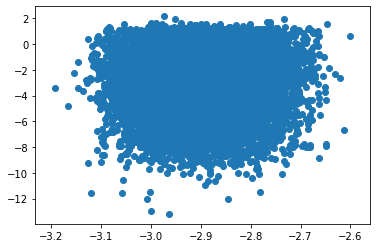

In [39]:
"""Mamy już miary oceny modelu ale ciężko nam je zinterpretować. Spróbujmy przeprowadzić taki eksperyment numeryczny.
Zbudujemy model stsując taką samą metodykę ale dane będą losowe - sprawdzimy w ten sposób czy dane niosą ze sobą jakąkolwiek
wartościawą informację oraz czy zastosowana metodyka jest słuszna"""

"""Najpierw tworzymy obiekt DaaFrame z losowymi danymi. Proszę poeksperymentować z zakresem losowanych liczb i sprawdzić
czy ma to jakieś znaczenie""" 
X_rand = pd.DataFrame(np.random.randint(0,100,size=X.shape), columns=X.columns)

regRand = linear_model.LinearRegression(normalize=True)
regRand.fit(X_rand, Y)
y_pred = regRand.predict(X_rand)

"""Zastosujmy naszą funkcję to wypisania metryk oceny modelu, a także namalujmy wykres "Observed vs Predicted")"""
modelResults("Learn metrics", Y, y_pred)
plt.scatter(x=y_pred, y=Y)
plt.show()

In [40]:
"""Proszę zwrócić uwagę na różnice w wartościach RMSE, NRMSE i R2 dla modelu uczonego na danych losowych oraz dla 
modelu uczonego na danych rzeczywistych. Jakieś wnioski?"""

'Proszę zwrócić uwagę na różnice w wartościach RMSE, NRMSE i R2 dla modelu uczonego na danych losowych oraz dla \nmodelu uczonego na danych rzeczywistych. Jakieś wnioski?'

# Uczenie i testowanie modelu

In [29]:
"""Do tej pory nie oceniliśmy jak model będzie zachowywał się w warunkach rzeczywistych, czyli jak będzie przewidywał 
LogS dla owych substancji chemicznych. Żeby to ocenić musimy stworzyć warunki do takich testów - czyli wydzielić ze zbioru
danych część testową oraz częsć uczącą. Pamiętajmy o parametrze shuffle!"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.25, random_state=1, shuffle=True)

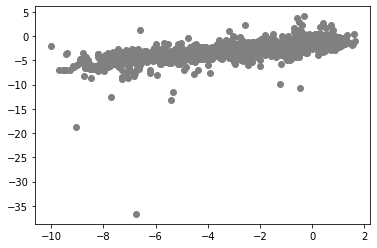

Learn metrics
R2: 0.4851329780937603
RMSE: 1.7038924511341234
NRMSE: 11.13 %
Test metrics
R2: 0.4398135825454611
RMSE: 1.752514935546278
NRMSE: 15.05 %


In [48]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, shuffle=True)
regTest = linear_model.LinearRegression(normalize=True)
regTest.fit(X_train, y_train)

"""Porównajmy błąd uczenia (y_learn_pred) i testowania (y_pred)"""
y_pred = pd.DataFrame(regTest.predict(X_test))
y_learn_pred = pd.DataFrame(regTest.predict(X_train))

plt.scatter(y_test, y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)


In [54]:
"""Jeżeli uruchomimy powyższy kod kilkukrotnie to zaobserwujemy pewne zmiany. Wynikają one z losowego podziału danych,
na zbiory uczace oraz testowe. Żeby zminimalizować tą zmienność,wprowadziny metodę k-krotnej cross walidacji. 
Dzięki temu ocena naszych modeli podczas testowania oraz dobór optymalnych parametrów modelu będzie mniej obciążony 
zjawiskiem losowego podziału danych na zbiory uczące oraz testowe."""

cv = model_selection.KFold(n_splits=10, shuffle=True)
scores = model_selection.cross_validate(regTest, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
print(-scores['test_neg_root_mean_squared_error'].mean())
print(scores['test_r2'].mean())

1.7298290475510771
0.46349109640550223


In [ ]:
"""Proszę uruchomić powyższy kod kilkukrotnie. Co obserwujemy?"""

# Złożoność modelu i regularyzacja

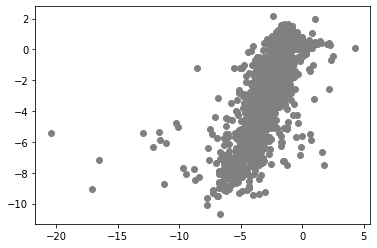

Learn metrics
R2: 0.4776664963856624
RMSE: 1.7069509856128222
NRMSE: 11.32 %
Test metrics
R2: 0.4945012186336082
RMSE: 1.7011507234032153
NRMSE: 13.29 %


In [57]:
"""Model regresji liniowej w zasadzie będzie używał szystkich zmiennych niezależnych do predykcji wartości zmiennej
zależnej. Zobaczmy czy da się uprościć problem stosująć inny rodzaj regresji: Lasso"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=1, shuffle=True)

regLasso = linear_model.Lasso(alpha=0.02)
regLasso.fit(X_train, y_train)
y_pred = pd.DataFrame(regLasso.predict(X_test))
y_learn_pred = pd.DataFrame(regLasso.predict(X_train))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)


In [60]:
"""Zobaczmy czy nasz model używa wszystkich zmiennych czy może niektóre zostały wykluczone ze względu na proces
regulrayzacji? Jakie wnioski/hipotezy możemy wyciągnąć?"""
results=pd.DataFrame(regLasso.coef_, index=X.columns)
results

,0
MolWt,-0.004739
MolLogP,-0.446652
MolMR,0.024041
HeavyAtomCount,-0.000000
NumHAcceptors,0.127457
NumHDonors,0.113140
NumHeteroatoms,-0.036733
NumRotatableBonds,-0.013196
NumValenceElectrons,0.017761
NumAromaticRings,-0.015436


In [62]:
"""W regresji Lasso pojawia się parametr alfa, od którego będzie zależał proces uczenia modelu - optymalizacja gradientowa.
Zobaczmy jaka jest wartość optymalna alfa - sporóbujmy zoptymalizować/tuningować parametry modelu. Oczywiście zastosujemy
metodę 10-cv"""
cv = model_selection.KFold(n_splits=10, shuffle=True)
for i in np.arange(0.02, 5, 0.02):
    reg = linear_model.Lasso(alpha=i, max_iter=10000)
    scores = model_selection.cross_validate(reg, X=X, y=Y, cv=cv, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("R2:", scores['test_r2'].mean())

Alpha: 0.02
RMSE: 1.7324011911451116
R2: 0.46207562971776894
Alpha: 0.04
RMSE: 1.727304567358982
R2: 0.46607823508856583
Alpha: 0.06
RMSE: 1.7352680639773983
R2: 0.459404697943299
Alpha: 0.08
RMSE: 1.7371820727380871
R2: 0.4580940193183194
Alpha: 0.1
RMSE: 1.7333582375336072
R2: 0.4605455897932115
Alpha: 0.12000000000000001
RMSE: 1.7409365599579174
R2: 0.4549925511499501
Alpha: 0.13999999999999999
RMSE: 1.7393314593696343
R2: 0.45891634682312327
Alpha: 0.16
RMSE: 1.7448079180101241
R2: 0.45463491035021664
Alpha: 0.18
RMSE: 1.747400537254593
R2: 0.45196371148574943
Alpha: 0.19999999999999998
RMSE: 1.7474485712995111
R2: 0.4539803495719415
Alpha: 0.22
RMSE: 1.7504993067814811
R2: 0.44886733357169606
Alpha: 0.24
RMSE: 1.7552366006056204
R2: 0.4468589359760923
Alpha: 0.26
RMSE: 1.7549383882592804
R2: 0.4485980407193246
Alpha: 0.28
RMSE: 1.756173429948309
R2: 0.44767247291136086
Alpha: 0.30000000000000004
RMSE: 1.7570499859456017
R2: 0.44821983474193755
Alpha: 0.32
RMSE: 1.756737522256254
R

Alpha: 2.62
RMSE: 1.9098252918383367
R2: 0.3473258051368126
Alpha: 2.64
RMSE: 1.9108715555033595
R2: 0.3464325349919837
Alpha: 2.66
RMSE: 1.9105729940235023
R2: 0.3479345441449107
Alpha: 2.68
RMSE: 1.9094789782377544
R2: 0.3487726954415951
Alpha: 2.7
RMSE: 1.9099946330409874
R2: 0.34796748192443816
Alpha: 2.72
RMSE: 1.9092923659088523
R2: 0.3480667930201401
Alpha: 2.74
RMSE: 1.9119198636628116
R2: 0.34725604762305695
Alpha: 2.7600000000000002
RMSE: 1.9109087327071972
R2: 0.34559269699369244
Alpha: 2.7800000000000002
RMSE: 1.9128996838169516
R2: 0.3459873605528053
Alpha: 2.8000000000000003
RMSE: 1.9110718640312498
R2: 0.3475170626802496
Alpha: 2.8200000000000003
RMSE: 1.9101289930526828
R2: 0.3475576854361682
Alpha: 2.84
RMSE: 1.9103633561886362
R2: 0.3476098260506728
Alpha: 2.86
RMSE: 1.910419683308349
R2: 0.3470391930678966
Alpha: 2.88
RMSE: 1.912336880703391
R2: 0.34643241263924346
Alpha: 2.9
RMSE: 1.910066422626058
R2: 0.34776231003164837
Alpha: 2.92
RMSE: 1.909384195577298
R2: 0.34

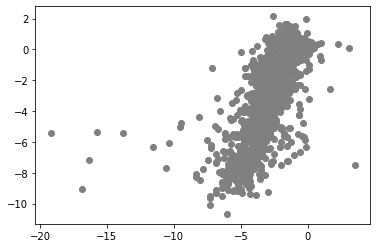

Learn metrics
R2: 0.4776664963856624
RMSE: 1.7069509856128222
NRMSE: 11.32 %
Test metrics
R2: 0.47036525336065094
RMSE: 1.7412894642531769
NRMSE: 13.61 %


In [63]:
"""Proszę zobaczyć jak łatwo możemy dodawać kolejne typy modeli do naszego systemetycznego procesu. Zachęcam do dodania 
własnego moduły odpowiedzialnego za uczenie/testowanie modelu inna metodą oraz tuningu parametrów :)"""
regEl = linear_model.ElasticNet(alpha=0.5, l1_ratio=0.5)
regEl.fit(X_train, y_train)
y_pred = regEl.predict(X_test)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

# Wielomiany

In [65]:
"""Zbudowaliśmy różne modele ale w czasie pracy możemy również modyfikować dane. Zobaczmy jak można wymusić na regresji 
liniowej interakcje między zmiennymi oraz "nieliniowość" - zastosujemy rozwinięcie wielomianowe naszego wektora X"""
X_poly=preprocessing.PolynomialFeatures(interaction_only=False).fit_transform(X)

In [66]:
"""Ile mamy zmienny niezależnych?"""
X_poly.shape

(9982, 153)

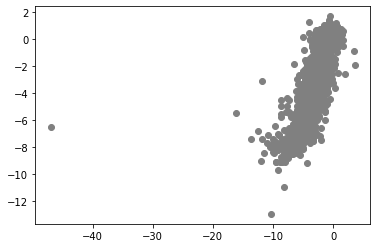

Learn metrics
R2: 0.6969549988089991
RMSE: 1.3088803293641258
NRMSE: 8.55 %
Test metrics
R2: 0.5126479284901417
RMSE: 1.6259496059356033
NRMSE: 11.10 %


In [69]:
"""Powtórzmy nasz proces budowy, testowania modeli"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X_poly, Y, test_size=0.20, random_state=42, shuffle=True)

regPoly = linear_model.LinearRegression()
regPoly.fit(X_train, y_train)
y_pred = regPoly.predict(X_test)
y_learn_pred = regPoly.predict(X_train)

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [ ]:
"""Proszę zwrócić uwagę na wartosci metryk uczenia i testowania - model może być przeuczony - zbyt dopasowany do danych"""

In [73]:
"""Zobaczmy model regresji Lasso. Proszę zobaczyć czy są duże różnice między metrykami uczenia i testowania"""
cv = model_selection.KFold(n_splits=10, shuffle=True)
for i in np.arange(0.05, 1, 0.05):
    regLass = linear_model.Lasso(alpha=i, max_iter=1000, tol=0.5)
    scores = model_selection.cross_validate(regLass, X=X_poly, y=Y, cv=cv, 
                                            return_train_score=True, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Alpha:" , i)
    print("learn_RMSE:", -scores['train_neg_root_mean_squared_error'].mean())
    print("test_RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("learn_R2:", scores['test_r2'].mean())
    print("test_R2:", scores['test_r2'].mean())

Alpha: 0.05
learn_RMSE: 1.4719947321171334
test_RMSE: 1.5596379686784263
learn_R2: 0.5588432128232643
test_R2: 0.5588432128232643
Alpha: 0.1
learn_RMSE: 1.4745914943103249
test_RMSE: 1.5263061634792598
learn_R2: 0.5827709017011278
test_R2: 0.5827709017011278
Alpha: 0.15000000000000002
learn_RMSE: 1.4767409676678924
test_RMSE: 1.523607558588017
learn_R2: 0.583700548490579
test_R2: 0.583700548490579
Alpha: 0.2
learn_RMSE: 1.4797398348497561
test_RMSE: 1.5330434433983744
learn_R2: 0.5783793091750379
test_R2: 0.5783793091750379
Alpha: 0.25
learn_RMSE: 1.4826479097693155
test_RMSE: 1.540509374742606
learn_R2: 0.5733379905186838
test_R2: 0.5733379905186838
Alpha: 0.3
learn_RMSE: 1.48594229077352
test_RMSE: 1.5269612664289343
learn_R2: 0.5827442517468555
test_R2: 0.5827442517468555
Alpha: 0.35000000000000003
learn_RMSE: 1.4892387425332139
test_RMSE: 1.5349659194379768
learn_R2: 0.5764169673169325
test_R2: 0.5764169673169325
Alpha: 0.4
learn_RMSE: 1.4935639690632256
test_RMSE: 1.53070249061205

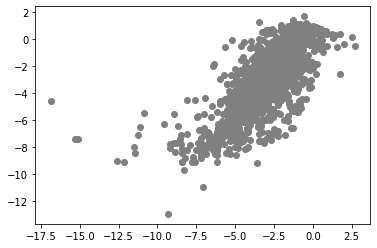

Learn metrics
R2: 0.6969549988089991
RMSE: 1.3088803293641258
NRMSE: 8.55 %
Test metrics
R2: 0.6000860221423996
RMSE: 1.4728854259004909
NRMSE: 10.05 %


In [77]:
"""Optymalna wartość alfa wyniosła 0,15 - oceniamy na podstawie błędu testowania RMSE i R2"""
reg = linear_model.Lasso(alpha=0.15, max_iter=1000, tol=0.5)
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
y_pred_train = pd.DataFrame(reg.predict(X_train))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)


In [72]:
scores

{'fit_time': array([0.01735067, 0.0171032 , 0.01747155, 0.01750517, 0.01757431,
        0.02048969, 0.01798296, 0.01743412, 0.01776075, 0.01837635]),
 'score_time': array([0.00174332, 0.00197506, 0.00180888, 0.00176454, 0.00182843,
        0.00310779, 0.00176311, 0.00175261, 0.00205708, 0.00201917]),
 'test_neg_root_mean_squared_error': array([-1.53497992, -1.5767882 , -1.58964409, -1.58362777, -1.67641216,
        -1.55648891, -1.5299325 , -1.56468949, -1.67651326, -1.54458419]),
 'train_neg_root_mean_squared_error': array([-1.56294079, -1.55490071, -1.55303198, -1.55783269, -1.54284051,
        -1.55933965, -1.56205883, -1.56147553, -1.54965098, -1.56079484]),
 'test_r2': array([0.57886767, 0.5330464 , 0.55605749, 0.55193994, 0.52183256,
        0.59282326, 0.56777166, 0.57998367, 0.48914849, 0.54451054]),
 'train_r2': array([0.56448148, 0.57117946, 0.5691322 , 0.56731127, 0.57317986,
        0.56342398, 0.5665194 , 0.56304679, 0.57253472, 0.56871809])}

# Sieci Neuronowe - MLP

In [79]:
"""Przejdźmy do tematyki sztucznych sieci neuronowych. Proces jest analogiczny - z różnicą wymogu skalowania danych"""
X_train, X_test, y_train, y_test = model_selection.train_test_split(
                                    X, Y, test_size=0.20, random_state=42, shuffle=True)

In [80]:
"""Skalujemy dane - tworzymy obiekt MinMaxScaler - osobno dla X i Y. W przypadku skalowania nowych danych np.
do testowania modelu musimy użyć zdefiniowanego obiektu do skalowania (nauczonego na danych uczących)"""
scalerX=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerX.fit(X_train)
X_train_scaled=scalerX.transform(X_train)
X_test_scaled=scalerX.transform(X_test)

scalerY=preprocessing.MinMaxScaler(feature_range=(0, 1))
scalerY.fit(y_train)
y_train_scaled=scalerY.transform(y_train)
y_test_scaled=scalerY.transform(y_test)

/home/adam/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/adam/anaconda3/envs/ML/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


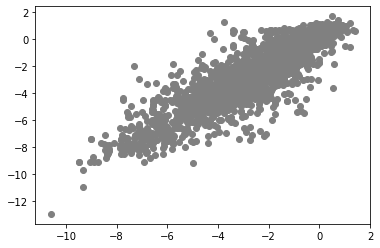

Learn metrics
R2: 0.6969549988089991
RMSE: 1.3088803293641258
NRMSE: 8.55 %
Test metrics
R2: 0.7532099313223757
RMSE: 1.1570430348778242
NRMSE: 7.90 %


In [91]:
"""Tworzymy sieć neuronową - prosze zobaczyć jakie parametry możemy modyfikować - optymalizować/tuningować"""
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(100, 50, 30), activation='relu', solver='lbfgs',
                            max_iter=1000)

mlp.fit(X_train_scaled, y_train_scaled)

"""Pamiętajmy, że po wykonaniu predykcji dane musimy ponownie skalować w celu obliczenia rzeczywistych wartości 
przewidywanych przez model: scaler*.inverse_transform"""
y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [ ]:
"""Prosze zobaczyć jakie mamy metryki modelu. A co jak zastosujemy nasz X_poly? Prosze sprawdzić"""

In [93]:
"""Spróbujmy zoptymalizować architekturę modelu Proponuję poddać inne parametry modelu modyfikacj jak liczba iteracji,
funkcja aktywacji, rodzaj algorytmu uczącego etc. Tutaj zaczyna się dopiero robić ciekawie :)"""

cv = model_selection.KFold(n_splits=10, shuffle=True)
architectures=[(5,5,5), (10,10,10), (20, 10, 7)]
for i in architectures:

    mlp=neural_network.MLPRegressor(hidden_layer_sizes=i, activation='relu', solver='lbfgs',
                                max_iter=2000)

    scores = model_selection.cross_validate(mlp, X=X_train_scaled, y=y_train_scaled.ravel(), cv=cv, 
                                            return_train_score=True, scoring=['neg_root_mean_squared_error', 'r2'])
    print("Architecture: " , i)
    print("learn_RMSE:", -scores['train_neg_root_mean_squared_error'].mean())
    print("test_RMSE:", -scores['test_neg_root_mean_squared_error'].mean())
    print("learn_R2:", scores['test_r2'].mean())
    print("test_R2:", scores['test_r2'].mean())



Architecture:  (5, 5, 5)
learn_RMSE: 0.10419785282792762
test_RMSE: 0.10520175703193435
learn_R2: 0.5158955250012786
test_R2: 0.5158955250012786
Architecture:  (10, 10, 10)
learn_RMSE: 0.08312962510669673
test_RMSE: 0.08549816240620813
learn_R2: 0.6960925500766281
test_R2: 0.6960925500766281
Architecture:  (20, 10, 7)
learn_RMSE: 0.0805564425773742
test_RMSE: 0.08307641359870496
learn_R2: 0.7127243692214523
test_R2: 0.7127243692214523


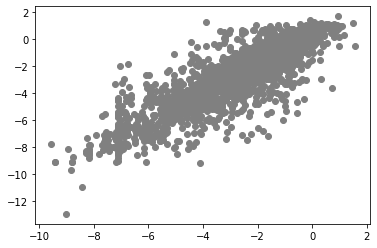

Learn metrics
R2: 0.6969549988089991
RMSE: 1.3088803293641258
NRMSE: 8.55 %
Test metrics
R2: 0.7313642276435045
RMSE: 1.2071676678101735
NRMSE: 8.24 %


In [95]:
"""Sprawdzamy jak najlepszy model/architektura sprawdza się podczas testowania."""
mlp=neural_network.MLPRegressor(hidden_layer_sizes=(20, 10, 7), activation='relu', solver='lbfgs',
                            max_iter=2000)

mlp.fit(X_train_scaled, y_train_scaled.ravel())

y_pred = scalerY.inverse_transform(mlp.predict(X_test_scaled).reshape(-1,1))
y_pred_train = scalerY.inverse_transform(mlp.predict(X_train_scaled).reshape(-1,1))

plt.scatter(y=y_test, x=y_pred,  color='gray')
plt.show()

modelResults("Learn metrics", y_train, y_learn_pred)
modelResults("Test metrics", y_test, y_pred)

In [96]:
"""Teraz proszę wybrać jedną dodatkową metodę budowy modelu i wprowadzić do swojego systematycznego podejścia"""


'Teraz proszę wybrać jedną dodatkową metodę budowy modelu i wprowadzić do swojego systematycznego podejścia'